# Convolution Neural Network (CNN)
### Using the MINST DATASET for images

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
single_image.shape

(28, 28)

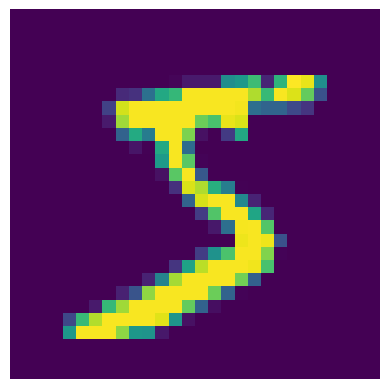

In [11]:
plt.imshow(single_image)
plt.axis('off');

## LABEL ( y are the labels)

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [14]:
from tensorflow.keras.utils import to_categorical

In [15]:
y_train.shape

(60000,)

In [18]:
y_example = to_categorical(y_train)
y_example

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [19]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [20]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

## Normalization 

In [27]:
print("The Max value of the image is: ",single_image.max())
print("The min value of the image is: ",single_image.min())

The Max value of the image is:  255
The min value of the image is:  0


In [23]:
x_train = x_train/255
x_test = x_test/255

In [28]:
scaled_single = x_train[0]
scaled_single.max()

1.0

Visualizing the scaled image

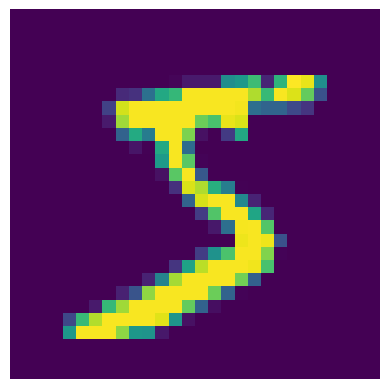

In [29]:
plt.imshow(scaled_single)
plt.axis('off');

## Reducing the Data size

old x_train

In [31]:
x_train.shape

(60000, 28, 28)

In [32]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

new X_train

In [33]:
x_train.shape

(60000, 28, 28, 1)

In [34]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

## Training the Model 

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [39]:
model = Sequential()

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu'))

# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN LAYER 
model.add(Flatten())

# DENSE HIDDEN LAYER
model.add(Dense(128, activation='relu'))

# LAST LAYER
model.add(Dense(10, activation='softmax'))

#COMPILING THE MODEL
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Summary of the model

In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               589952    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591786 (2.26 MB)
Trainable params: 591786 (2.26 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

## Train the Model 

In [41]:
model.fit(x_train,y_cat_train,epochs=25,validation_data=(x_test,y_cat_test))

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1418 - accuracy: 0.9584 - val_loss: 0.0524 - val_accuracy: 0.9825
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0471 - accuracy: 0.9855 - val_loss: 0.0403 - val_accuracy: 0.9866
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0290 - accuracy: 0.9912 - val_loss: 0.0393 - val_accuracy: 0.9874
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0327 - val_accuracy: 0.9893
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0136 - accuracy: 0.9956 - val_loss: 0.0361 - val_accuracy: 0.9892
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0099 - accuracy: 0.9969 - val_loss: 0.0374 - val_accuracy: 0.9897
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.0392 - val_accuracy:

### Evaluation 

In [45]:
print("The first metric is: ",model.metrics_names[0])
print("The second metric is: ",model.metrics_names[1])

The first metric is:  loss
The second metric is:  accuracy


In [46]:
new_metrics = pd.DataFrame(model.history.history)

In [47]:
new_metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.141777,0.958383,0.052412,0.9825
1,0.047071,0.985517,0.040329,0.9866
2,0.029025,0.991167,0.039349,0.9874
3,0.021083,0.993417,0.032677,0.9893
4,0.013579,0.995567,0.036093,0.9892


## Visualization 

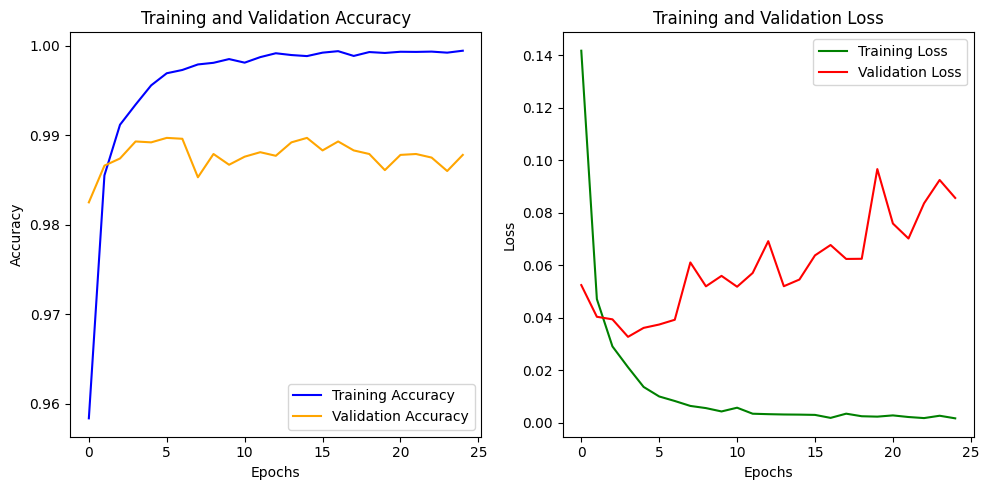

In [50]:
# Plotting accuracy and validation accuracy
plt.figure(figsize=(10, 5))

# Plotting accuracy
plt.subplot(1, 2, 1)
plt.plot(new_metrics['accuracy'], label='Training Accuracy', color='blue')
plt.plot(new_metrics['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss and validation loss
plt.subplot(1, 2, 2)
plt.plot(new_metrics['loss'], label='Training Loss', color='green')
plt.plot(new_metrics['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

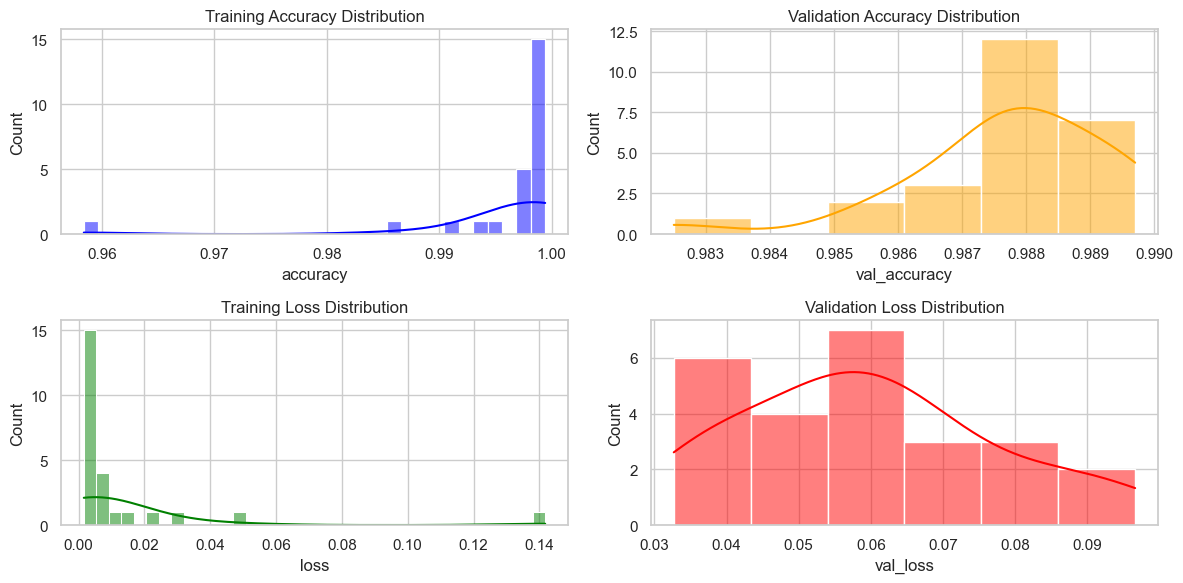

In [51]:
# Set the style
sns.set(style="whitegrid")

# Create subplots for each metric
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(new_metrics['accuracy'], color='blue', kde=True)
plt.title('Training Accuracy Distribution')

plt.subplot(2, 2, 2)
sns.histplot(new_metrics['val_accuracy'], color='orange', kde=True)
plt.title('Validation Accuracy Distribution')

plt.subplot(2, 2, 3)
sns.histplot(new_metrics['loss'], color='green', kde=True)
plt.title('Training Loss Distribution')

plt.subplot(2, 2, 4)
sns.histplot(new_metrics['val_loss'], color='red', kde=True)
plt.title('Validation Loss Distribution')

plt.tight_layout()
plt.show()

In [52]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.08564022928476334, 0.9878000020980835]
